In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Dell/Desktop/Data Analytics Course/Netzwerk Machine-Learning-master/Machine-Learning-master/Datasets/01-Petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
df = df.iloc[:,1:]

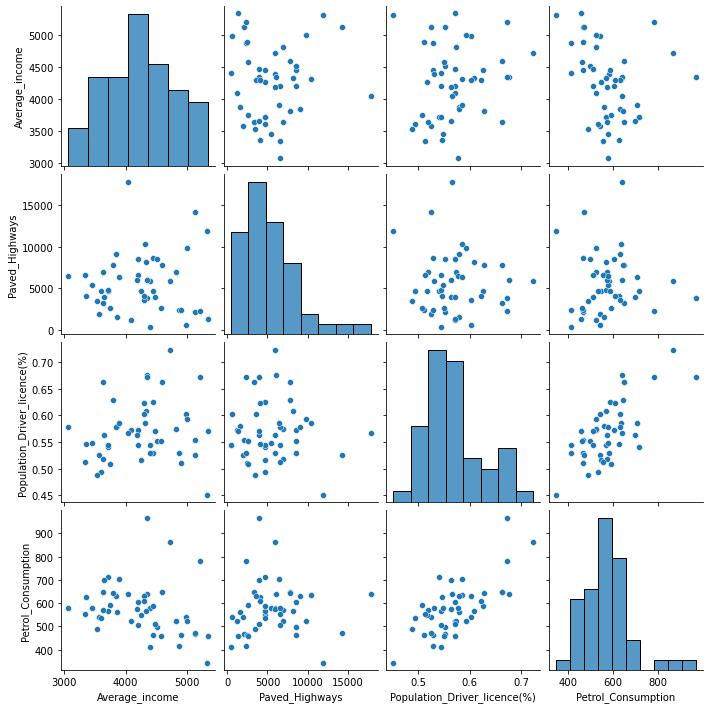

In [6]:
sns.pairplot(df)

In [7]:
df.isna().sum()

Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Average_income                48 non-null     int64  
 1   Paved_Highways                48 non-null     int64  
 2   Population_Driver_licence(%)  48 non-null     float64
 3   Petrol_Consumption            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [27]:
df.dtypes

Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(x)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
y_pred = lr.predict(xtest)

In [35]:
y_pred

array([604.4236627 , 776.98498795, 595.28094428, 557.548825  ,
       499.13262465, 641.24502628, 503.99207912, 549.41158649,
       426.3332187 , 605.02801371])

In [36]:
lr.score(xtest,ytest)#Ip

0.6886145410452333

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
mean_squared_error(ytest,y_pred)

3082.1555498260714

In [40]:
r2_score(ytest, y_pred)


0.6886145410452333

In [41]:
prediction_output = pd.DataFrame([y_pred,ytest],index = ['ytest','y_predict'])

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)

ridge=Ridge()
#parameters={'alpha':[1.0]}
ridge_regressor=GridSearchCV(ridge,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
ridge_regressor.fit(x, y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
lasso=Lasso()
#parameters={'alpha':[1.0]}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.1)
lasso_regressor=GridSearchCV(lasso,grid,scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

lasso_regressor.fit(x, y)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_absolute_error')

In [45]:

prediction_lasso=lasso_regressor.predict(xtest)
prediction_ridge=ridge_regressor.predict(xtest)


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
mean_squared_error(ytest,prediction_ridge)

2795.233069054279

In [48]:
r2_score(ytest, prediction_ridge)

0.7176018802353681

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
mean_squared_error(ytest,prediction_lasso)

2790.120322574938

In [51]:
r2_score(ytest, prediction_lasso)

0.7181184131887679